<a href="https://colab.research.google.com/github/imdasrj98/Employee-Churn-Prediction/blob/master/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('/content/drive/My Drive/final_data_employee_churn.csv')

In [3]:
df.head()

,Unnamed: 0,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
0,0,1,0.38,0.53,2,157,3,0,0,7,1,1
1,1,2,0.80,0.86,5,262,6,0,0,7,2,1
2,2,3,0.11,0.88,7,272,4,0,0,7,2,1
3,3,4,0.72,0.87,5,223,5,0,0,7,1,1
4,4,5,0.37,0.52,2,159,3,0,0,7,1,1


In [4]:
left = df.groupby('left')
left.mean() 

,Unnamed: 0,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
left,,,,,,,,,,,
0,5713.5,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,1785.0,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


In [5]:
df.describe()

,Unnamed: 0,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,4778.192746,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,5.870525,1.347290,0.238083
std,3368.302882,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.868786,0.625819,0.425924
min,0.000000,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1874.500000,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,3928.000000,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,7.000000,1.000000,0.000000
75%,7677.500000,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,8.000000,2.000000,0.000000
max,11427.000000,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000,1.000000


In [6]:
df.columns

Index(['Unnamed: 0', 'Emp ID', 'satisfaction_level', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'dept', 'salary', 'left'],
      dtype='object')

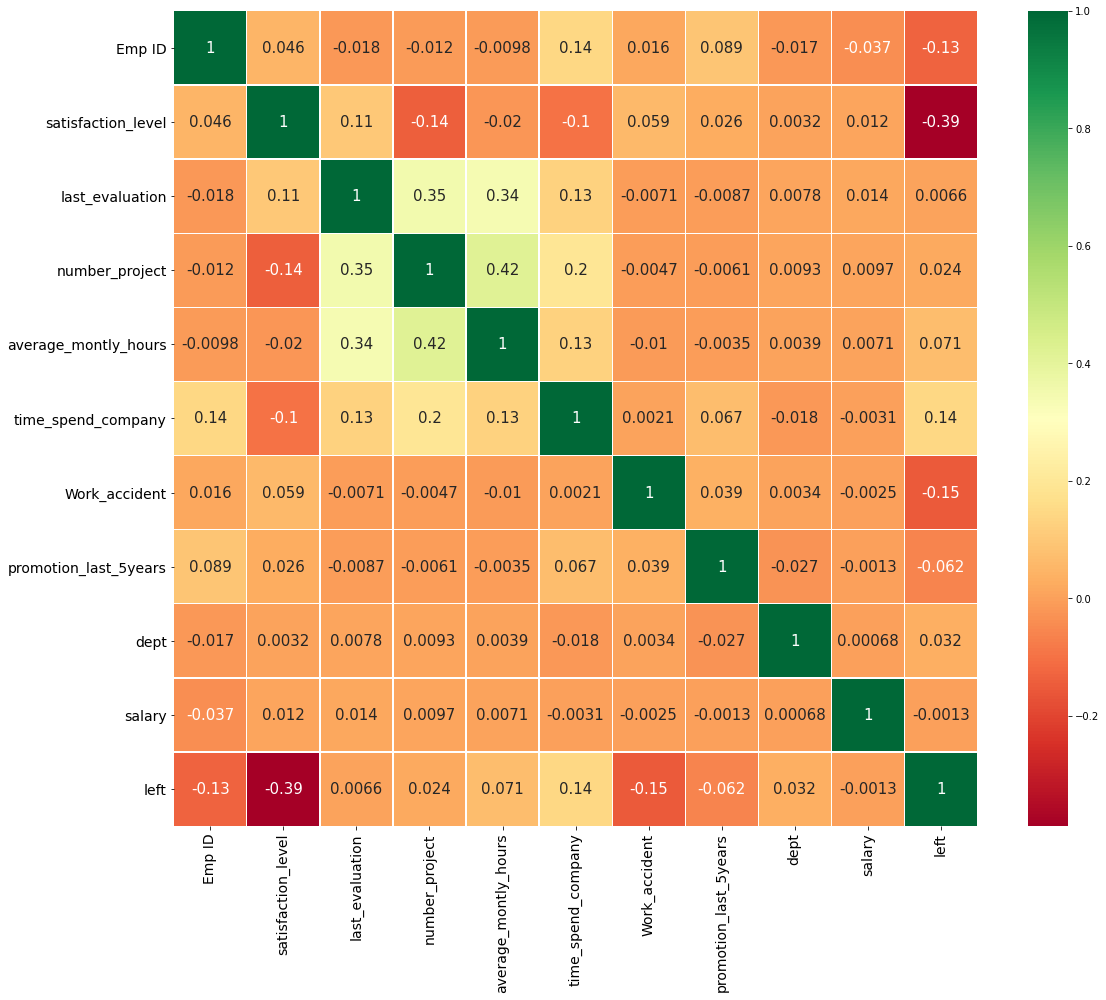

In [7]:
fig=sns.heatmap(df[['Emp ID', 'satisfaction_level', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'dept', 'salary', 'left']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

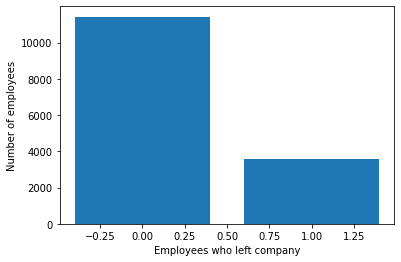

In [8]:
left_c = df.groupby('left').count()
plt.bar(left_c.index.values, left_c['satisfaction_level'])
plt.xlabel('Employees who left company')
plt.ylabel('Number of employees')
plt.show()

In [9]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

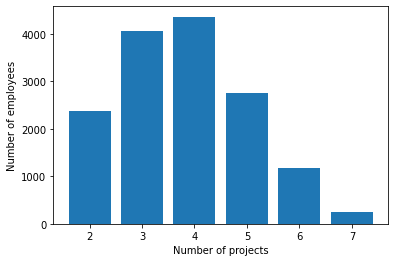

In [10]:
number_proj = df.groupby('number_project').count()
plt.bar(number_proj.index.values, number_proj['satisfaction_level'])
plt.xlabel('Number of projects')
plt.ylabel('Number of employees')
plt.show()

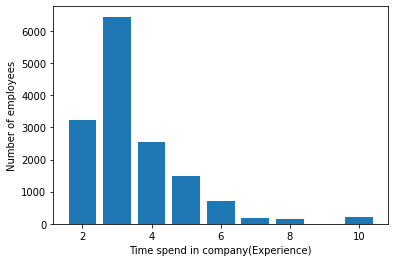

In [11]:
time = df.groupby('time_spend_company').count()
plt.bar(time.index.values, time['satisfaction_level'])
plt.xlabel('Time spend in company(Experience)')
plt.ylabel('Number of employees')
plt.show()

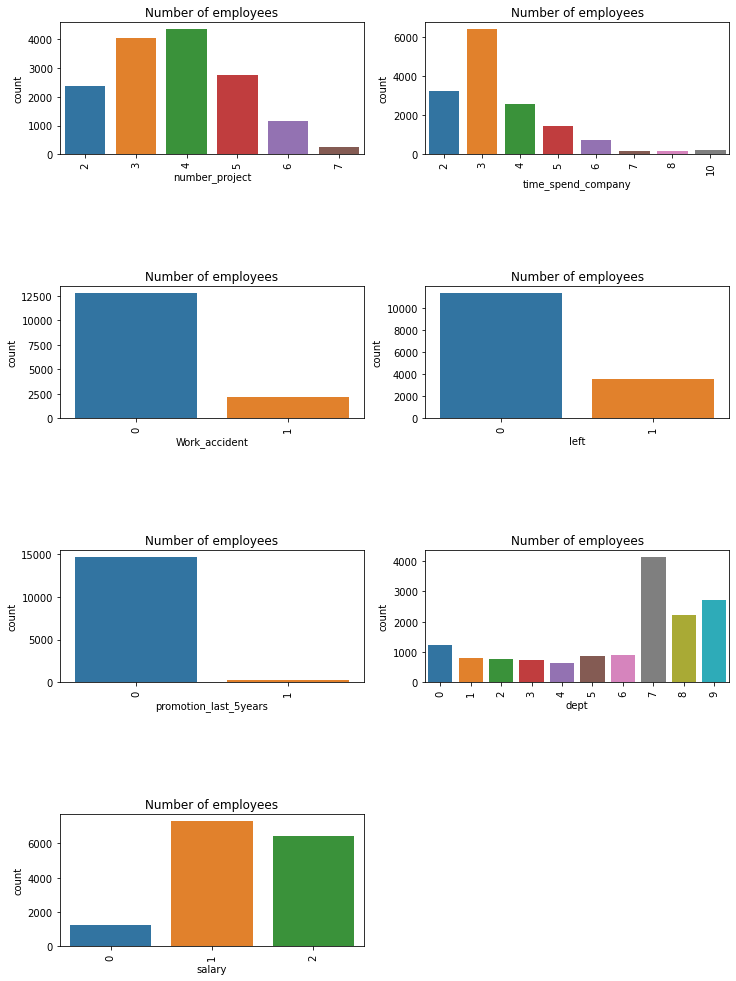

In [12]:
feat = ['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','dept','salary']
fig = plt.subplots(figsize=(12,17))
for i, j in enumerate(feat):
  plt.subplot(4, 2, i+1)
  plt.subplots_adjust(hspace = 1.0)
  sns.countplot(x = j,data = df)
  plt.xticks(rotation = 90)
  plt.title("Number of employees")

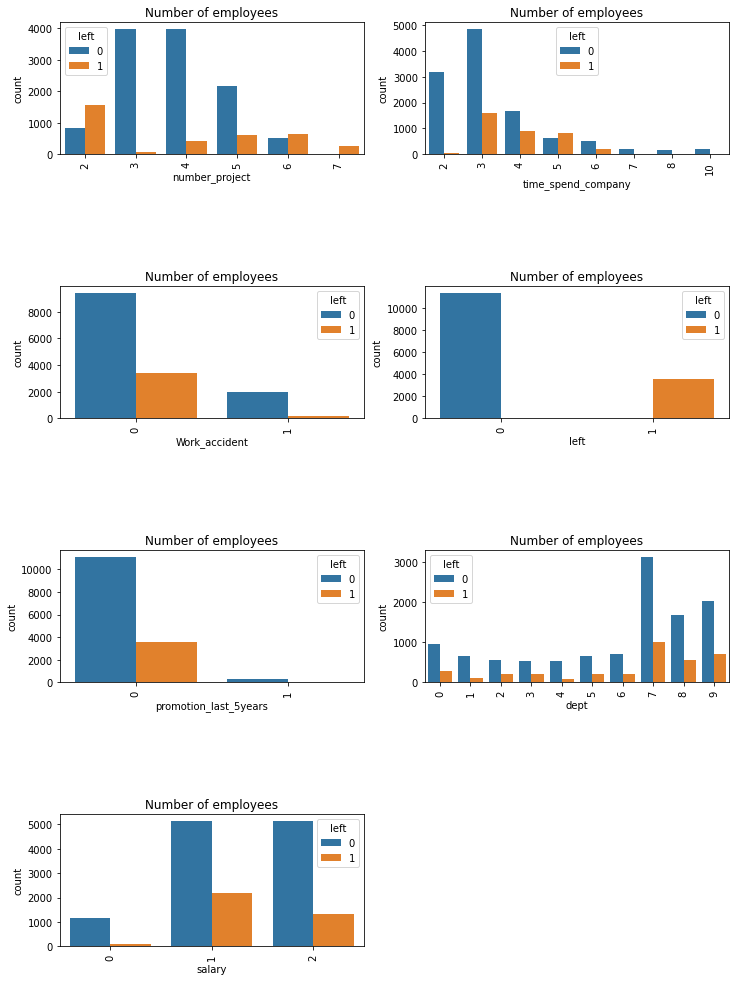

In [13]:
fig=plt.subplots(figsize=(12,17))
for i, j in enumerate(feat):
  plt.subplot(4, 2, i+1)
  plt.subplots_adjust(hspace = 1.0)
  sns.countplot(x = j,data = df, hue = 'left')
  plt.xticks(rotation = 90)
  plt.title("Number of employees")

In [14]:
from sklearn.cluster import KMeans
emp_left =  df[['satisfaction_level', 'last_evaluation']][df.left == 1]
kmeans = KMeans(n_clusters = 3, random_state = 43).fit(emp_left)

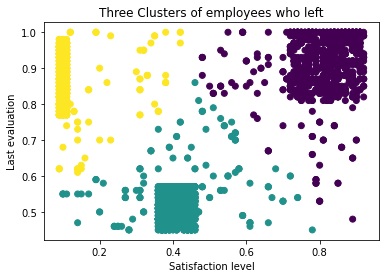

In [15]:
emp_left['label'] = kmeans.labels_
plt.scatter(emp_left['satisfaction_level'], emp_left['last_evaluation'], c = emp_left['label'],cmap = 'viridis')
plt.xlabel('Satisfaction level')
plt.ylabel('Last evaluation')
plt.title('Three Clusters of employees who left')
plt.show()